<a href="https://colab.research.google.com/github/kleeresearch/TextAnalysis/blob/master/Course/Day4/17_PCA_KMeans_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

과정

1. 전처리
2. vectorization → 고차원 벡터를 얻음
3. PCA를 적용 → 저차원 벡터를 얻음
4. 이 두 결과에 K-Means를 적용한다.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import warnings
warnings.filterwarnings('ignore')

아래와 같이 텍스트 파일을 읽어 옵니다.

In [6]:
import numpy as np
from os import listdir
from os.path import isfile, join

mypath = '/content/drive/MyDrive/KOSSDA_텍스트마이닝_강의자료/강의자료/Day4/python_code/example_En_docs/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles.sort()

total_docs = []
for file in onlyfiles:
    file_path = mypath+file
    with open(file_path, 'r', encoding='utf8') as f:
        content = f.read()
    total_docs.append(content)

In [7]:
len(total_docs)

15

In [8]:
total_docs[0]

'Ryen Aleman was engrossed in the virtual world, focused on the video game in front of him, when he realized the gunshots he was hearing were real. He ducked and bolted for a restroom to take cover.\nAnother mass shooting was unfolding in Florida, this time at a tournament for competitive players of the football video game, Madden, in Jacksonville. The winners would go on to a higher level tournament in Las Vegas in October, where large cash prizes could be won.\nParticipants had gathered at the Jacksonville Landing Complex, an open-air marketplace with stores, bars and restaurants along the St. Johns River.\n\nDavid Katz, a 24-year-old gamer from Baltimore, Maryland, was in Jacksonville for the tournament at GLHF Game Bar, in the back of a pizza restaurant. On Sunday, he brought a gun into the venue and opened fire, killing two people. Then he turned the gun on himself, Jacksonville Sheriff Mike Williams said. Police have not released a possible motive.\nKatz used at least one handgun

In [9]:
import re
import nltk
from nltk.corpus import stopwords

def do_En_preprocessing(text, customized_stopwords):
    cleaned_content = re.sub(r'[^\w\d\s]','',text) # To remove symbols
    cleaned_content = cleaned_content.lower() # Case conversion, upper -> lower
    word_tokens = nltk.word_tokenize(cleaned_content) # Tokenization
    tokens_pos = nltk.pos_tag(word_tokens) # POS tagging
    NN_words = []   # To select nouns
    for word, pos in tokens_pos:
        if 'NN' in pos:
            NN_words.append(word)

    wlem = nltk.WordNetLemmatizer()   # Lemmatization
    lemmatized_words = []
    for word in NN_words:
        lemmatized_words.append(wlem.lemmatize(word))
    # 불용어 제거
    stopwords_list = stopwords.words('english')
    unique_NN_words = set(lemmatized_words)
    final_NN_words = lemmatized_words
    for word in unique_NN_words:
        if word in stopwords_list:
            while word in final_NN_words:
                final_NN_words.remove(word)

    unique_NN_words1 = set(final_NN_words)
    for word in unique_NN_words1:
        if word in customized_stopwords:
            while word in final_NN_words:
                final_NN_words.remove(word)

    return final_NN_words

In [10]:
customized_stopwords = ['be', 'today', 'yesterday', 'tomorrow'] # 불용어 사전 생성하기

In [21]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
docs_nouns = [do_En_preprocessing(doc, customized_stopwords) for doc in total_docs]

In [23]:
print(docs_nouns[0]) # 첫번째 문서에 대한 내용 ((문서 내용, [명사단어])로 구성)

['aleman', 'world', 'video', 'game', 'front', 'gunshot', 'restroom', 'cover', 'mass', 'shooting', 'florida', 'time', 'tournament', 'player', 'football', 'video', 'game', 'madden', 'jacksonville', 'winner', 'level', 'tournament', 'vega', 'october', 'cash', 'prize', 'participant', 'jacksonville', 'marketplace', 'store', 'bar', 'restaurant', 'st', 'john', 'river', 'david', 'gamer', 'baltimore', 'maryland', 'jacksonville', 'tournament', 'game', 'bar', 'back', 'pizza', 'restaurant', 'sunday', 'gun', 'venue', 'fire', 'people', 'gun', 'mike', 'williams', 'police', 'motive', 'katz', 'handgun', 'sheriff', 'people', 'wound', 'people', 'area', 'williams', 'victim', 'condition', 'hospital', 'sheriff', 'horror', 'stream', 'event', 'game', 'shot', 'people', 'person', 'f', 'whatd', 'call', 'williams', 'officer', 'scene', 'minute', 'bathroom', 'minute', 'ran', 'scene', 'im', 'member', 'jacksonville', 'fire', 'station', 'rock', 'training', 'parking', 'garage', 'street', 'landing', 'dozen', 'people', 'p

In [24]:
documents_filtered = [' '.join(doc) for doc in docs_nouns]
# 불필요한 단어들을 제거하고 난후 DTM로 변환하기 위해 다시 list of strings의 형태로 변환

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
DTM_tfidf = tfidf_vectorizer.fit_transform(documents_filtered)
DTM_TFIDF = np.array(DTM_tfidf.todense())

In [26]:
DTM_TFIDF.shape

(15, 1166)

너무 뭉쳐있어서 군집화가 의미가 없어진다.

그래서 차원 축소를 진행한다.

원본 데이터에 존재하는 feature 의 수 = 1166개 -> 주성분 PC의 수도 같으므로 1166개도 같다.

그러나 성분마다 설명하는 것이 다르다.

얘를 10개의 벡터로 줄이면 10차원으로 줄어든다.

In [27]:
from sklearn.decomposition import PCA

In [28]:
# 10개의 주성분 추출
pca = PCA(n_components=10)
pca_results_tfidf = pca.fit_transform(DTM_TFIDF)

In [29]:
pca_results_tfidf.shape

(15, 10)

위 정보를 이용해서 k-means 를 한다.

In [30]:
# 각 주성분이 원 데이터를 설명하는 정도 확인
pca.explained_variance_ratio_

array([0.16995738, 0.15595055, 0.14023592, 0.10953876, 0.06273507,
       0.05587951, 0.04982095, 0.04679968, 0.04422534, 0.04143181])

첫번쨰로 설명하는 주성분은 17%가 된다.

17%들을 다 더 하면 87-88%가 된다.

10개로 줄이는 차원 축소를 했더니 성능이 88% 수준으로 좋아졌다.

In [31]:
# 10개의 주성분에 의해 설명되는 전체 양
sum(pca.explained_variance_ratio_)

0.8765749661517416

## KMeans 적용하기

In [32]:
from sklearn.cluster import KMeans

In [33]:
kmeans = KMeans(n_clusters=5)
clusters_pca_tfidf = kmeans.fit_predict(pca_results_tfidf)

In [34]:
clusters_pca_tfidf

array([4, 4, 4, 3, 3, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2], dtype=int32)

## 실루엣 값 확인해 보기

In [35]:
from sklearn.metrics import silhouette_score
print(silhouette_score(pca_results_tfidf, clusters_pca_tfidf))
# PCA 군집화에 대한 실루엣 값이 더 큼

0.37140149068114786


차원 축소를 한 이후에 k-means 를 적용했을 때 군집화의 성능이 더 좋아진다.

설명력이 높은 순으로 계산이 된다.



차원축소의 목적:

1) 차원 축소를 한 다음에 군집화 분석을 하게 되면 성능이 더 좋아진다.

2) 시각화의 목적


몇차원으로 차원 축소를 하면 될까? 2차원 혹은 3차원 형태로 바꾸면 된다. PCA 분석을 통해 2개 혹은 3개의 주성분만 선책하면 된다.

In [36]:
kmeans1 = KMeans(n_clusters=5, random_state=42)
clusters_tfidf = kmeans1.fit_predict(DTM_TFIDF)

In [37]:
clusters_tfidf

array([1, 1, 1, 4, 4, 2, 2, 2, 3, 3, 3, 3, 0, 0, 0], dtype=int32)

In [38]:
print(silhouette_score(DTM_TFIDF, clusters_tfidf))

0.24302353093870305


## 군집화 분석 결과 시각화 해보기

In [39]:
pca = PCA(n_components=2)
pca_results_tfidf = pca.fit_transform(DTM_TFIDF)

In [40]:
kmeans = KMeans(n_clusters=5)
clusters_pca_tfidf = kmeans.fit_predict(pca_results_tfidf)

In [41]:
clusters_pca_tfidf

array([4, 4, 4, 2, 2, 3, 3, 3, 1, 1, 1, 1, 0, 0, 0], dtype=int32)

### 시각화

In [42]:
import pandas as pd

In [43]:
pca_results_tfidf

array([[ 0.19993907,  0.04679687],
       [ 0.20542427,  0.05520981],
       [ 0.20753077,  0.02710286],
       [ 0.11769189,  0.23372281],
       [ 0.08629411,  0.26409893],
       [-0.20098562,  0.59100681],
       [-0.2069728 ,  0.52508623],
       [-0.21063928,  0.60576258],
       [-0.55055177, -0.450778  ],
       [-0.37438718, -0.26401396],
       [-0.45003143, -0.36962659],
       [-0.51019459, -0.44451107],
       [ 0.57867775, -0.28894968],
       [ 0.5394925 , -0.25432694],
       [ 0.56871231, -0.27658068]])

In [44]:
data = pd.DataFrame(pca_results_tfidf, columns=['x1', 'x2'])

In [45]:
data['cluster_id']=clusters_pca_tfidf.tolist()

In [46]:
data.head(3)

,x1,x2,cluster_id
0,0.199939,0.046797,4
1,0.205424,0.055210,4
2,0.207531,0.027103,4


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

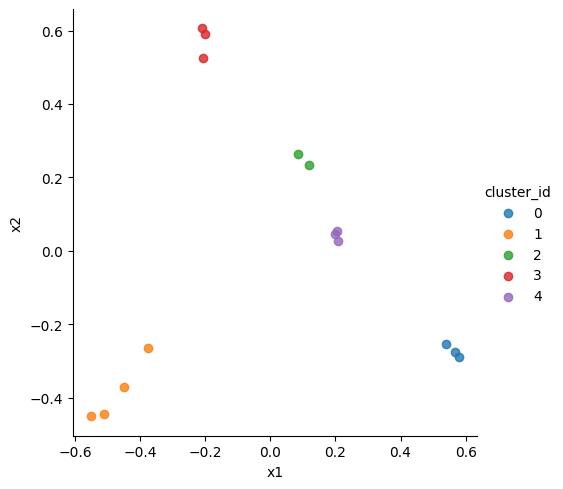

In [48]:
sns.lmplot(x='x1', y='x2', data=data, hue='cluster_id',fit_reg=False )
plt.show()

군집화 결과를 시각화를 통해 알 수 있다. 불필요한 정보는 빼는 게 나을 수도 있다.